<div class="alert alert-info">
    <h1 align="center">WiDS Workshop October 2023</h1>
    <h3 align="center">Build Your Own AI Chatbot with GPT!</h3>
    <h5 align="center"><a href="https://www.linkedin.com/in/prasasthy-kb/">Prasasthy Balasubramanian</a></h5>
</div>

##  Objectives
- Designing, Developing, and Deploying custom Chatbots: Learn to design, develop, and deploy chatbots.
- Exploring GPT-3.5 Turbo: Explore the capabilities of GPT-3.5 Turbo.
- Utilizing Hugging Face Gradio to Launch Your Bot in Less Than 10 Minutes: Discover how to use Hugging Face Gradio for a chatbot launch in under 10 minutes.
- Overcoming Development Challenges: Address and overcome common development challenges.
- Importance of ethical considerations for building chatbots.>
ng)

   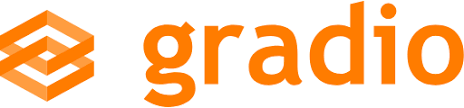 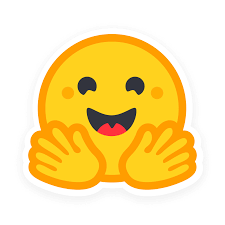 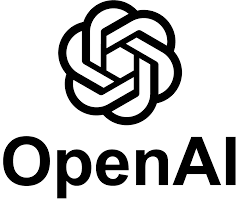

## Step1 : Building basic framework

In [1]:
import gradio as gr
import openai
import random
import time

In [2]:
# Set up OpenAI API key
openai.api_key = "Your openAI API key"


In [3]:
system_message = {"role": "system", "content": "You are a helpful assistant."}

In [4]:
    def user(user_message, history):
        return "", history + [[user_message, None]]

    def bot(history, messages_history):
        user_message = history[-1][0]
        bot_message, messages_history = use_gpt(user_message, messages_history)
        messages_history += [{"role": "assistant", "content": bot_message}]
        history[-1][1] = bot_message
        time.sleep(1)
        return history, messages_history

    def use_gpt(message, messages_history):
        messages_history += [{"role": "user", "content": message}]
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=messages_history
        )
        return response['choices'][0]['message']['content'], messages_history

    def detail_history(messages_history):
        messages_history = []
        messages_history += [system_message]
        return messages_history

In [5]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.Button("Clear")

    state = gr.State([])

    msg.submit(user, [msg, chatbot], [msg, chatbot], queue=False).then(
        bot, [chatbot, state], [chatbot, state]
    )

    clear.click(lambda: None, None, chatbot, queue=False).success(detail_history, [state], [state])

demo.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
